In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leer y filtrar todos los datos csv
def read_filter_data(signal_name):
    csv_iq = "Datos/" + signal_name + "-IQ.csv"
    csv_signal = "Datos/" + signal_name + "-Signal.csv"
    df_iq = pd.read_csv(csv_iq)
    df_signal = pd.read_csv(csv_signal)

    df_iq = df_iq.iloc[::-1]
    df_signal = df_signal.iloc[::-1]

    d = {'iq': df_iq["iq"], 'rssi' : df_signal["rssi"]}
    df_total = pd.DataFrame(data=d)

    df_total = df_total.reset_index(drop=True)

    return df_total

In [4]:
read_filter_data("AZ")

,iq,rssi
0,"[0, 4, -60, 1, 21, 13, -44, -30, 123, -28, 33,...",16
1,"[71, 57, -55, 21, 82, -15, 112, -14, 88, -5, 3...",16
2,"[66, 47, 24, -10, 54, -43, -124, 25, 95, -7, -...",16
3,"[1, 1, 71, 41, 116, 46, -107, 35, 41, -51, -62...",16
4,"[64, -59, 54, -20, -128, 22, 37, -16, -23, 62,...",16
...,...,...
995,"[-38, -3, 54, 56, 54, 42, -29, -32, -109, -33,...",16
996,"[1, 19, 118, -33, -40, 7, 57, 14, 47, -64, 51,...",16
997,"[-117, -100, 4, 96, -17, -91, 79, 41, 117, 70,...",13
998,"[94, 18, -126, -13, 102, 39, -44, -49, -69, -7...",16


In [3]:
# Convertir lista de string en lista de enteros (para obtener vector iq)
def iq_string_to_lists(lista):
    
    list = lista.split (",")

    list_i = []
    list_q = []
    index = 1
    for i in list:
        if ('[' in i): # Filtrado de datos
            i = i[1:]
        elif (']' in i): # Filtrado de datos
            i = i[:-1]
        if (index % 2 == 0): # Índice par
            list_q.append(int(i))
        else: # Índice impar
            list_i.append(int(i))
        index = index + 1
    #print(list_i)
    #print(list_q)
        
    return list_i, list_q

In [5]:
# Para cada registro, hacer una matriz (numpy) que sea de 3x60 con [in, qn, rssi] y guardarla 
# guardar la variable de cada 100 registros en un .npy (100 registros de 16x16x16 cada .npy) tienen que salir 800 (10x80)
# AZ_0, AZ_1 ... AZ_9, BZ_0 ...
def pasar_lista(signal_name, df_total):
    for iteracion in range(0, 10): # 1000 registros / 100 registros por muestra = 10 iteraciones
        
        matrix = np.empty((100, 121), int) # Tenemos una matriz de 100x121
        
        # 100 registros por cada muestra
        for i in range (0, 100): 
            i_vector, q_vector = iq_string_to_lists(df_total["iq"][i+(iteracion*100)])
            
            aux_list = i_vector + q_vector
            aux_list.append(df_total["rssi"][i+iteracion*100]) 
            
            matrix[i] = np.array(aux_list)   
         
        str_route   = "Variables/" + signal_name + "_" + str(iteracion) 
        
        np.save(str_route, matrix)

In [4]:
# Sacamos todas las señales que tenemos a partir del Excel padre

dfs = pd.read_excel("Clasificador_señales.xlsx", index_col=0)
signal_name = dfs.index.tolist()

#display(dfs)

In [53]:
# No ejecutar, solo es necesario para generar los .npy

for signal in signal_name:
    df_total = read_filter_data(signal)
    pasar_lista(signal, df_total)

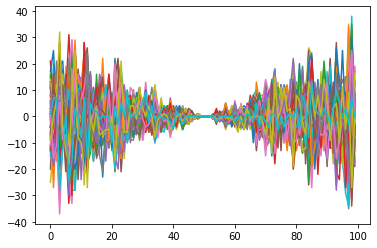

In [19]:
import matplotlib.pyplot as plt
import math

df_total = read_filter_data("AZ")

matrix = np.empty((100, 2, 60), int)

ii = np.empty((100, 60), int)
qq = np.empty((100, 60), int)

pi = math.pi

t = np.arange(200, 300, 1)

for i in range (0, 100): 
    i_vector, q_vector = iq_string_to_lists(df_total["iq"][i+200])
    matrix[i][0] = np.array([i_vector])
    matrix[i][1] = np.array([q_vector])

    ii[i] = matrix[i][0]*math.sin(2*math.pi*(t[i]/1000))
    qq[i] = matrix[i][1]*math.cos(2*math.pi*(t[i]/1000))

#i = plt.plot(ii)
p = plt.plot(qq)